# New Delhi PM 2.5 Data

The dataset used for this analysis encompasses six distinct CSV files, each file representing a year from 2019-2024. The first step was to merge all of these CSV files into a single dataset, to be able to analyze data across the entire timeframe.  

In [348]:
# importing libraries
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

  
# merging csv files into single dataframe 
df = pd.concat( 
    map(pd.read_csv, [    
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2019_YTD.csv',
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2020_YTD.csv',
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2021_YTD.csv',
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2022_YTD.csv',
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2023_YTD.csv',
    'D:/AirQuality/Delhi/NewDelhi_PM2.5_2019-2024/NewDelhi_PM2.5_2024_YTD.csv']) )

#printing out first five rows of dataset
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2019-01-01 01:00 AM,2019,1,1,1,463.1,475,Hazardous,543.0,UG/M3,1 Hr,Valid
1,New Delhi,PM2.5 - Principal,2019-01-01 02:00 AM,2019,1,1,2,496.1,497,Hazardous,529.0,UG/M3,1 Hr,Valid
2,New Delhi,PM2.5 - Principal,2019-01-01 03:00 AM,2019,1,1,3,502.0,501,Hazardous,508.0,UG/M3,1 Hr,Valid
3,New Delhi,PM2.5 - Principal,2019-01-01 04:00 AM,2019,1,1,4,452.0,468,Hazardous,402.0,UG/M3,1 Hr,Valid
4,New Delhi,PM2.5 - Principal,2019-01-01 05:00 AM,2019,1,1,5,384.5,423,Hazardous,317.0,UG/M3,1 Hr,Valid


# Data Discovery

First I understood all the different datatypes in the dataset:

In [349]:
#printing datatypes 
print(df.info())
print('\n')
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 43667 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           43667 non-null  object 
 1   Parameter      43667 non-null  object 
 2   Date (LT)      43667 non-null  object 
 3   Year           43667 non-null  int64  
 4   Month          43667 non-null  int64  
 5   Day            43667 non-null  int64  
 6   Hour           43667 non-null  int64  
 7   NowCast Conc.  43667 non-null  float64
 8   AQI            43667 non-null  int64  
 9   AQI Category   43462 non-null  object 
 10  Raw Conc.      43667 non-null  float64
 11  Conc. Unit     43667 non-null  object 
 12  Duration       43667 non-null  object 
 13  QC Name        43667 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 5.0+ MB
None


               Year         Month           Day          Hour  NowCast Conc.  \
count  43667.000000  43667.000000  43667.000

Next, I changed the datatype of some columns for greater efficiency. For instance, I changed the Date column into date time format and changed most columns from object to category as it would better represent the data as well as save memory. 

In [350]:
#changed Date column into datetime format
df["Date (LT)"] = pd.to_datetime(df["Date (LT)"])

#changed the following columns to category from object

df['AQI Category'] = df['AQI Category'].astype('category')  
df['Site'] = df['Site'].astype('category') 
df['Parameter'] = df['Parameter'].astype('category')  
df['Parameter'] = df['Parameter'].astype('category')  
df['Conc. Unit'] = df['Conc. Unit'].astype('category') 
df['Duration'] = df['Duration'].astype('category') 
df['QC Name'] = df['QC Name'].astype('category') 

#Printing the new datatypes
print(df.dtypes)

Site                   category
Parameter              category
Date (LT)        datetime64[ns]
Year                      int64
Month                     int64
Day                       int64
Hour                      int64
NowCast Conc.           float64
AQI                       int64
AQI Category           category
Raw Conc.               float64
Conc. Unit             category
Duration               category
QC Name                category
dtype: object


# Data Structuring

A lot of the columns in the dataset were unnecessary, I removed them in order to save more memory. 

In [351]:
# dropping unecessary columns 
df = df.drop('Site', axis=1) #Site is New Delhi for all, unnecessary column
df = df.drop('Parameter', axis=1) #Parameter is PM 2.5 for all, unnecessary column  
df = df.drop('Conc. Unit', axis=1) #Concentration unit is same throughout, unnecessary column
df = df.drop('Duration', axis=1) #Duration is 1h for all, unnecessary column
df = df.drop('QC Name', axis=1) #QC column seems meaningless in this context
#Removed year, month, day & hour column as dataset already has Date column with all these details
df = df.drop('Year', axis=1) 
df = df.drop('Month', axis=1) 
df = df.drop('Day', axis=1) 
df = df.drop('Hour', axis=1) 

#Printing new columns
print(df)

               Date (LT)  NowCast Conc.  AQI AQI Category  Raw Conc.
0    2019-01-01 01:00:00          463.1  475    Hazardous      543.0
1    2019-01-01 02:00:00          496.1  497    Hazardous      529.0
2    2019-01-01 03:00:00          502.0  501    Hazardous      508.0
3    2019-01-01 04:00:00          452.0  468    Hazardous      402.0
4    2019-01-01 05:00:00          384.5  423    Hazardous      317.0
...                  ...            ...  ...          ...        ...
1435 2024-02-29 21:00:00           66.5  157    Unhealthy       82.0
1436 2024-02-29 22:00:00           76.2  162    Unhealthy       86.0
1437 2024-02-29 23:00:00           98.6  173    Unhealthy      121.0
1438 2024-03-01 00:00:00          104.3  176    Unhealthy      110.0
1439 2024-03-01 01:00:00          110.1  179    Unhealthy      116.0

[43667 rows x 5 columns]


# Data Cleaning

At this step, I identified all the null values in the dataset, and replaced them. 

In [352]:
total_elements = df.size
print("Total elements: ", total_elements)

null_counts = df.isnull().sum()
print('Number of null values:')
print(null_counts)

print('\n')
percentage_null_values = (null_counts / total_elements) * 100
print("Percentage of values which are null : ") 
print (percentage_null_values, "%")



Total elements:  218335
Number of null values:
Date (LT)          0
NowCast Conc.      0
AQI                0
AQI Category     205
Raw Conc.          0
dtype: int64


Percentage of values which are null : 
Date (LT)        0.000000
NowCast Conc.    0.000000
AQI              0.000000
AQI Category     0.093892
Raw Conc.        0.000000
dtype: float64 %


As seen above, the dataset only has 205 null values which are all in the AQI category. The null values make up only 0.09% of the total dataset. As this is a very small percentage, it was safe to replace those values with the mean of the overall AQI. 

In [353]:
mean_AQI = df['AQI'].mean()
df['AQI'].fillna(mean_AQI, inplace=True)

# Data Validation

At this stage, I looked for outliers and inconsistencies in the data and handled them accordingly.

As seen in the histogram, for the NowCast concentration data, there were several negative values, I replaced them with the mean of the remaning positive values.

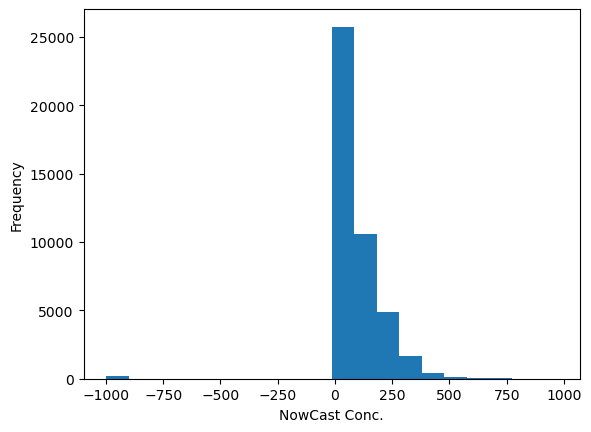

Number of negative values: 205
New mean: 
99.25352491831946


In [354]:
#plotting histogram
NowCast_data = df['NowCast Conc.']
plt.hist(NowCast_data, bins=20)
plt.xlabel('NowCast Conc.')
plt.ylabel('Frequency')
plt.show()

#finding number of negative values
negative_nowcast = (NowCast_data <= 0).sum()
print("Number of negative values:", negative_nowcast)

#replacing negative values, with mean of positive numbers
pos_nowcast = df[df['NowCast Conc.'] >= 0]
mean_pos_nowcast = pos_nowcast['NowCast Conc.'].mean()
df.loc[df['NowCast Conc.'] <= 0, 'NowCast Conc.'] = mean_pos_nowcast

print ("New mean: ")
print (NowCast_data.mean())

Next, I repeated simmilar steps for the AQI column. 

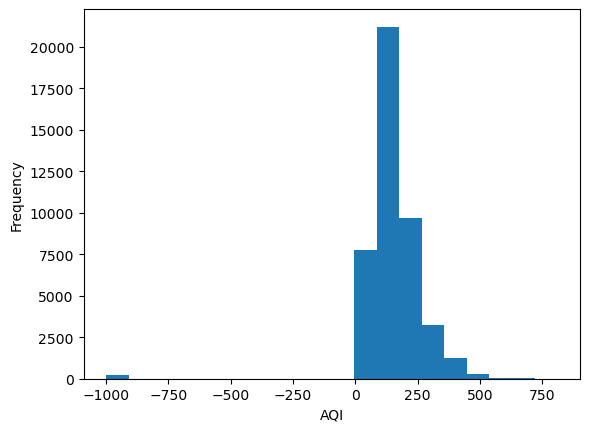

Number of negative values: 205
New mean: 
158.2238990542057


In [355]:
#plotting histogram
AQI_data = df['AQI']
plt.hist(AQI_data, bins=20)
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()
negative_AQI = (AQI_data <= 0).sum()
print("Number of negative values:", negative_AQI)

#replacing negative values, with mean of positive numbers
pos_AQI = df[df['AQI'] >= 0]
mean_pos_AQI = pos_AQI['AQI'].mean()
df.loc[df['AQI'] <= 0, 'AQI'] = mean_pos_AQI

print ("New mean: ")
print (AQI_data.mean())

For the AQI category, I first found out all the different possible fields in the column and how many times they appear. There were 7 unique categories, excluding the null values. Instead of replacing the null values in this column with the mode of the AQI category, I chose to drop the null values as the AQI category depends on the AQI index itself, not other factors.

In [356]:
#finding the different unique values in the AQI Category column 
unique_values = df['AQI Category'].unique()
print("Values in AQI Category:")
for value in unique_values:
    print(value)

#dropping the null values
df.dropna(subset=['AQI Category'], inplace=True)

Values in AQI Category:
Hazardous
Very Unhealthy
Unhealthy
Unhealthy for Sensitive Groups
Moderate
nan
Good


Next, simmilar to the AQI column, I first plotted a histogram for the Raw Conc column to deal with the outliers.

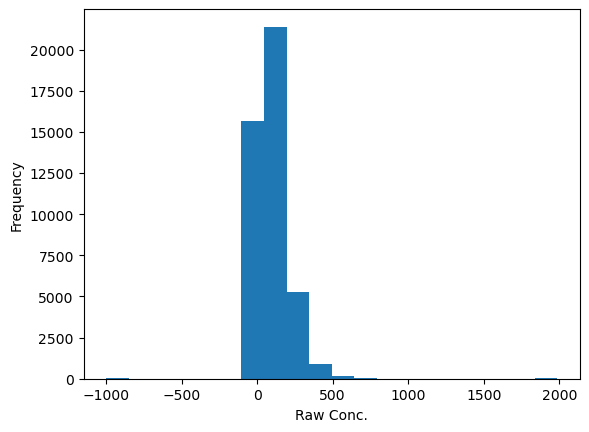

Number of negative values: 71
New mean: 
100.17176100771312


In [357]:
#plotting histogram
RawConc_data = df['Raw Conc.']
plt.hist(RawConc_data, bins=20)
plt.xlabel('Raw Conc.')
plt.ylabel('Frequency')
plt.show()

#finding number of negative values
negative_raw = (RawConc_data <= 0).sum()
print("Number of negative values:", negative_raw)

#replacing negative values, with mean of positive numbers
pos_raw = df[df['Raw Conc.'] >= 0]
mean_pos_raw = pos_raw['Raw Conc.'].mean()
df.loc[df['Raw Conc.'] <= 0, 'Raw Conc.'] = mean_pos_raw

print ("New mean: ")
print (RawConc_data.mean())

# Data Analysis

In [358]:
print(df.describe())

                           Date (LT)  NowCast Conc.           AQI  \
count                          43462   43462.000000  43462.000000   
mean   2021-08-17 14:08:58.815516928      99.253525    163.682251   
min              2019-01-01 01:00:00       0.600000      3.000000   
25%              2020-05-11 10:15:00      35.300000    100.000000   
50%              2021-08-11 02:30:00      64.700000    156.000000   
75%              2022-12-04 02:45:00     137.300000    193.000000   
max              2024-03-01 01:00:00     970.000000    810.000000   
std                              NaN      90.868811     84.717035   

          Raw Conc.  
count  43462.000000  
mean     100.171761  
min        1.000000  
25%       34.000000  
50%       64.000000  
75%      136.000000  
max     1985.000000  
std      101.164469  


First, I plotted a line plot graph to show the relationship between Nowcast Conc, AQI and Raw Conc. As observed in the graph below, the three variables seem to be very closley related often overlapping each other, this suggest a possible relationship between the three variables. However, there seems to be a large discrepancy between the Raw Conc. and AQI/NowCast Conc. in 2019. 

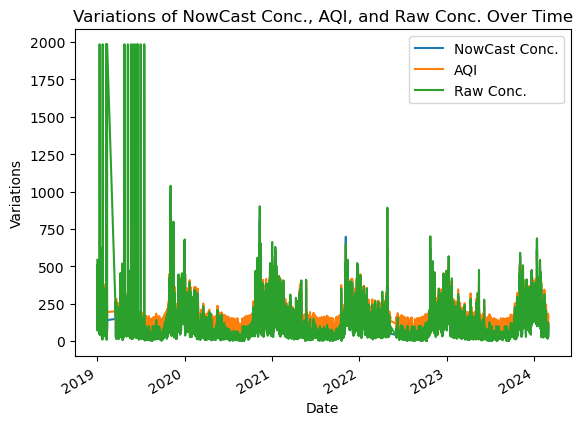

In [359]:
#Line Plot showing relationship between Raw Conc, AQI & NowCast Conc overtime:
df.set_index('Date (LT)', inplace=True)
df.plot(y=['NowCast Conc.', 'AQI', 'Raw Conc.'])
plt.xlabel('Date')
plt.ylabel('Variations')
plt.title('Variations of NowCast Conc., AQI, and Raw Conc. Over Time')
plt.show()


Next, I plotted each variable individually overtime. For both AQI, and NowCast Conc. the maximum was reached around 2020. The Raw Conc. in 2019 seems to be very odd compared to the values for the other years. 

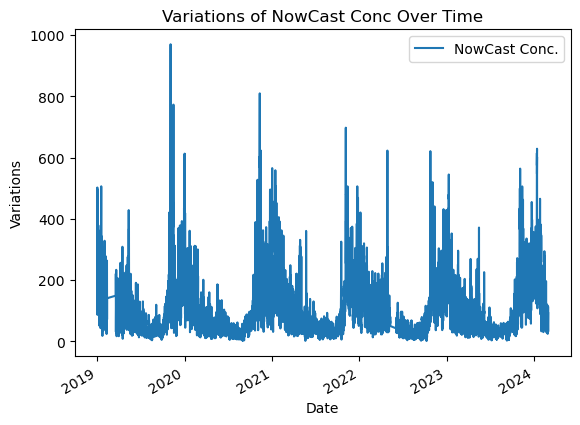

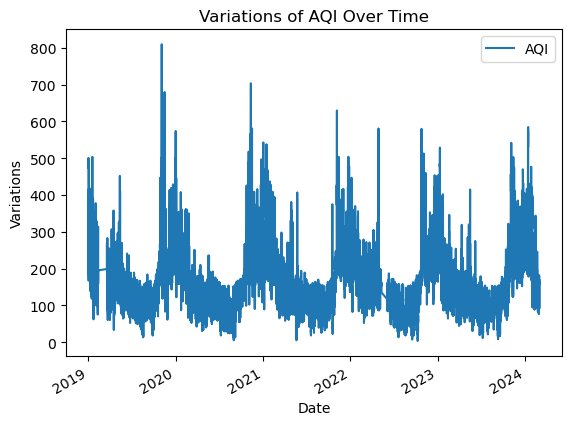

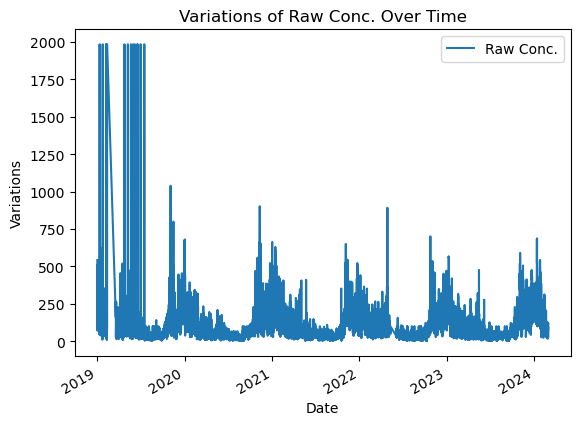

In [361]:
#plotting NowCast Conc. 
df.plot(y=['NowCast Conc.'])
plt.xlabel('Date')
plt.ylabel('Variations')
plt.title('Variations of NowCast Conc Over Time')
plt.show()

#plotting AQI
df.plot(y=['AQI'])
plt.xlabel('Date')
plt.ylabel('Variations')
plt.title('Variations of AQI Over Time')
plt.show()

#plotting Raw Conc
df.plot(y=['Raw Conc.'])
plt.xlabel('Date')
plt.ylabel('Variations')
plt.title('Variations of Raw Conc. Over Time')
plt.show()

Then, I plotted the AQI index for the year 2022 to see the monthly variations in AQI. 

In [363]:
#monthly variations - explanation 
#histogram for categories 
# histogram for all 